In [33]:
# import librabries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression , Ridge ,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [34]:
df = pd.read_csv('stud.csv')

In [35]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [36]:
# Preparing X and Y Variables

x=df.drop(columns='math_score',axis=1)

y=df['math_score']

y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [37]:
# Column Transformer with 3 type of transformers

num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

In [38]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",cat_transformer,cat_features),
        ("StandardScaler",num_transformer,num_features)

    ]
)

In [39]:
X = preprocessor.fit_transform(x)

In [40]:
X.shape

(1000, 19)

In [41]:
type(X)

numpy.ndarray

In [42]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

In [43]:
# Evalute Function to Give all Metrics after Model Training

def eval_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square
    

In [44]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbours Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range (len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train) #train model
    
    # prediction

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate train & test dataset

    model_train_mae, model_train_rmse, model_train_r2 = eval_model(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = eval_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance for training Set')
    print(f"RMSE = {model_train_rmse}")
    print(f"MAE = {model_train_mae}")
    print(f"R2 Score = {model_train_r2}")

    print('-'*25)

    print('Model Performance for Test Set')
    print(f"RMSE = {model_test_rmse}")
    print(f"MAE = {model_test_mae}")
    print(f"R2 Score = {model_test_r2}")

    r2_list.append(model_test_r2)

    print("="*35)
    print('\n')


Linear Regression
Model Performance for training Set
RMSE = 5.326296259033031
MAE = 4.271142578125
R2 Score = 0.8741639024226954
-------------------------
Model Performance for Test Set
RMSE = 5.405280096117172
MAE = 4.2262109375
R2 Score = 0.8799324195544951


Lasso
Model Performance for training Set
RMSE = 6.593815587795566
MAE = 5.206302661246526
R2 Score = 0.8071462015863456
-------------------------
Model Performance for Test Set
RMSE = 6.519694535667421
MAE = 5.157881810347763
R2 Score = 0.8253197323627852


Ridge
Model Performance for training Set
RMSE = 5.323324922741654
MAE = 4.264987823725981
R2 Score = 0.8743042615212909
-------------------------
Model Performance for Test Set
RMSE = 5.3903870169356365
MAE = 4.211100688014259
R2 Score = 0.880593148502874


K-Neighbours Regressor
Model Performance for training Set
RMSE = 5.70663210659317
MAE = 4.51375
R2 Score = 0.8555510616382387
-------------------------
Model Performance for Test Set
RMSE = 7.253040741647602
MAE = 5.621
R2

In [45]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879932
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.848721
8,AdaBoost Regressor,0.847323
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,K-Neighbours Regressor,0.783813
4,Decision Tree,0.759450


In [46]:
### Lineear Regression

In [48]:
lin_model = LinearRegression(fit_intercept =True) # y-intercept will be determined by the line of best fit
lin_model = lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test,y_pred)*100
print(f"Accuracy of the model is {score}")

Accuracy of the model is 87.9932419554495


Text(0, 0.5, 'Pedicted')

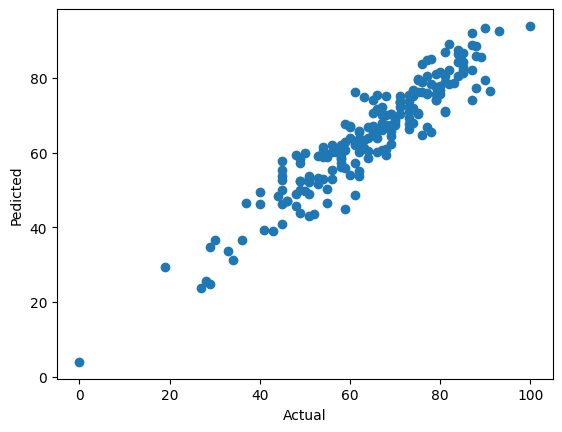

In [49]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Pedicted')

<Axes: xlabel='math_score'>

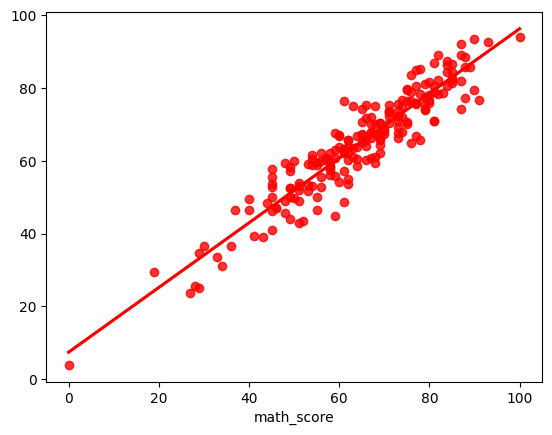

In [50]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [51]:
# residual

pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted value,Difference
521,91,76.625000,14.375000
737,53,58.984375,-5.984375
740,80,76.679688,3.320312
660,74,76.812500,-2.812500
411,84,87.507812,-3.507812
...,...,...,...
408,52,43.484375,8.515625
332,62,62.039062,-0.039062
208,74,67.992188,6.007812
613,65,67.257812,-2.257812
